In [1]:
import sys
sys.path.append('/home/sean/Documents/Work/Level 4/Level-4-Masters-Project/')

In [2]:

import tensorflow as tf 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import Hyperparam_Testing.Testing_Notebooks.Common_Functions as cf 
from tensorflow import keras
from tensorflow.keras import layers 
from tensorflow.keras import models 

from keras.regularizers import l2
from Hyperparam_Testing.Testing_Notebooks import chirallag as cL

import matplotlib
matplotlib.rcParams.update({'legend.fontsize': 16})
matplotlib.rcParams.update({'font.size': 16})

In [3]:
cf.g

AttributeError: module 'Hyperparam_Testing.Testing_Notebooks.Common_Functions' has no attribute 'g'

In [ ]:
def gen_and_load(n_pred,n_val):
    number_predictions= n_pred
    N = 3
    F0 = 1
    gens = cL.gen_gellman(3)
    pi=np.random.rand(number_predictions,N*N-1)**0.25
    dpi=np.random.rand(number_predictions,N*N-1)**0.25
    orig_V = abs(cL.get_V(pi,dpi,gens,F0).real)
    output = np.hstack((pi,dpi,np.expand_dims(orig_V,axis=1)))
    return [(output[:-n_val,:-1],output[:-n_val,-1]),(output[-n_val:,:-1],output[-n_val:,-1])]

In [ ]:
data = gen_and_load(1000,0)
data_x,data_y = data[1]

In [ ]:
data_x.shape

(1000, 16)

In [ ]:
pred_y = model.predict(data_x)

In [ ]:
pred_y = pred_y.reshape(pred_y.shape[0])


In [ ]:
baseline = np.mean(abs((data_y-pred_y)/data_y))*100

In [ ]:
### Applying guassian noise
def apply_noise(xs,noise_level):
    xs = xs+np.random.normal(size = xs.shape, scale= noise_level)
    xs[np.where(xs>1)] = 1
    xs[np.where(xs<0)] = 0
    return xs
mape = []
sigmas = np.logspace(-4,-1,num=100)
for i in sigmas:
    sum_mape = 0
    for j in range(10):
        noisy_x = apply_noise(data_x,i)
        pred_y_noise = model.predict(noisy_x).reshape(data_y.shape)
        sum_mape +=np.mean(abs((data_y-pred_y_noise)/data_y))*100
    mape.append(sum_mape/10)

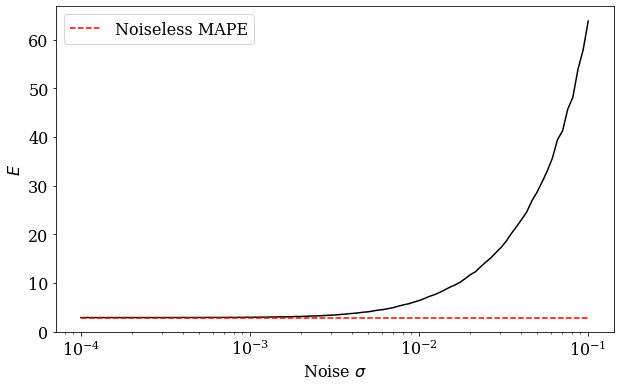

In [ ]:
fig  = plt.figure(figsize=(10,6))
plt.semilogx(sigmas,mape, c = 'black')
plt.plot(sigmas, np.ones_like(sigmas)*baseline,'r--', label = 'Noiseless MAPE')
plt.xlabel(r'Noise $\sigma$ ')
plt.ylabel('$E$')
plt.legend()
fig.savefig('/home/sean/Documents/Work/Level 4/Level-4-Masters-Project/Figures/mape_noise.png',dpi = 300)

0.641823042165421


[0.030941750192490975,
 0.08590197217166443,
 0.22523527372634194,
 0.101518337718456,
 0.037470301860090593]